In [53]:
import sklearn
import numpy as np 
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings #import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv('Glass.csv')
df

,IDNo,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [30]:
df.head()

,IDNo,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:
df.isnull().sum()

IDNo         0
RI           0
Sodium       0
Magnesium    0
Aluminum     0
Silicon      0
Potassium    0
Calcium      0
Barium       0
Iron         0
Glass        0
dtype: int64

In [32]:
df.describe()

,IDNo,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


IDNo            Axes(0.125,0.653529;0.0945122x0.226471)
RI           Axes(0.238415,0.653529;0.0945122x0.226471)
Sodium       Axes(0.351829,0.653529;0.0945122x0.226471)
Magnesium    Axes(0.465244,0.653529;0.0945122x0.226471)
Aluminum     Axes(0.578659,0.653529;0.0945122x0.226471)
Silicon      Axes(0.692073,0.653529;0.0945122x0.226471)
Potassium    Axes(0.805488,0.653529;0.0945122x0.226471)
Calcium         Axes(0.125,0.381765;0.0945122x0.226471)
Barium       Axes(0.238415,0.381765;0.0945122x0.226471)
Iron         Axes(0.351829,0.381765;0.0945122x0.226471)
Glass        Axes(0.465244,0.381765;0.0945122x0.226471)
dtype: object

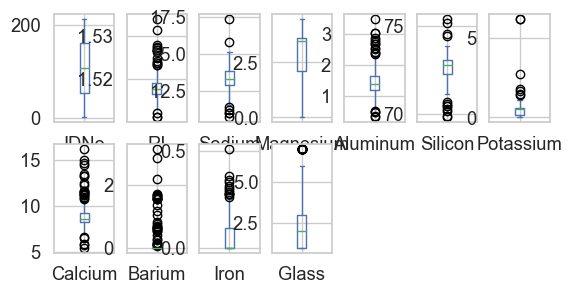

In [33]:
df.plot(kind='box',subplots=True,layout=(3,7))

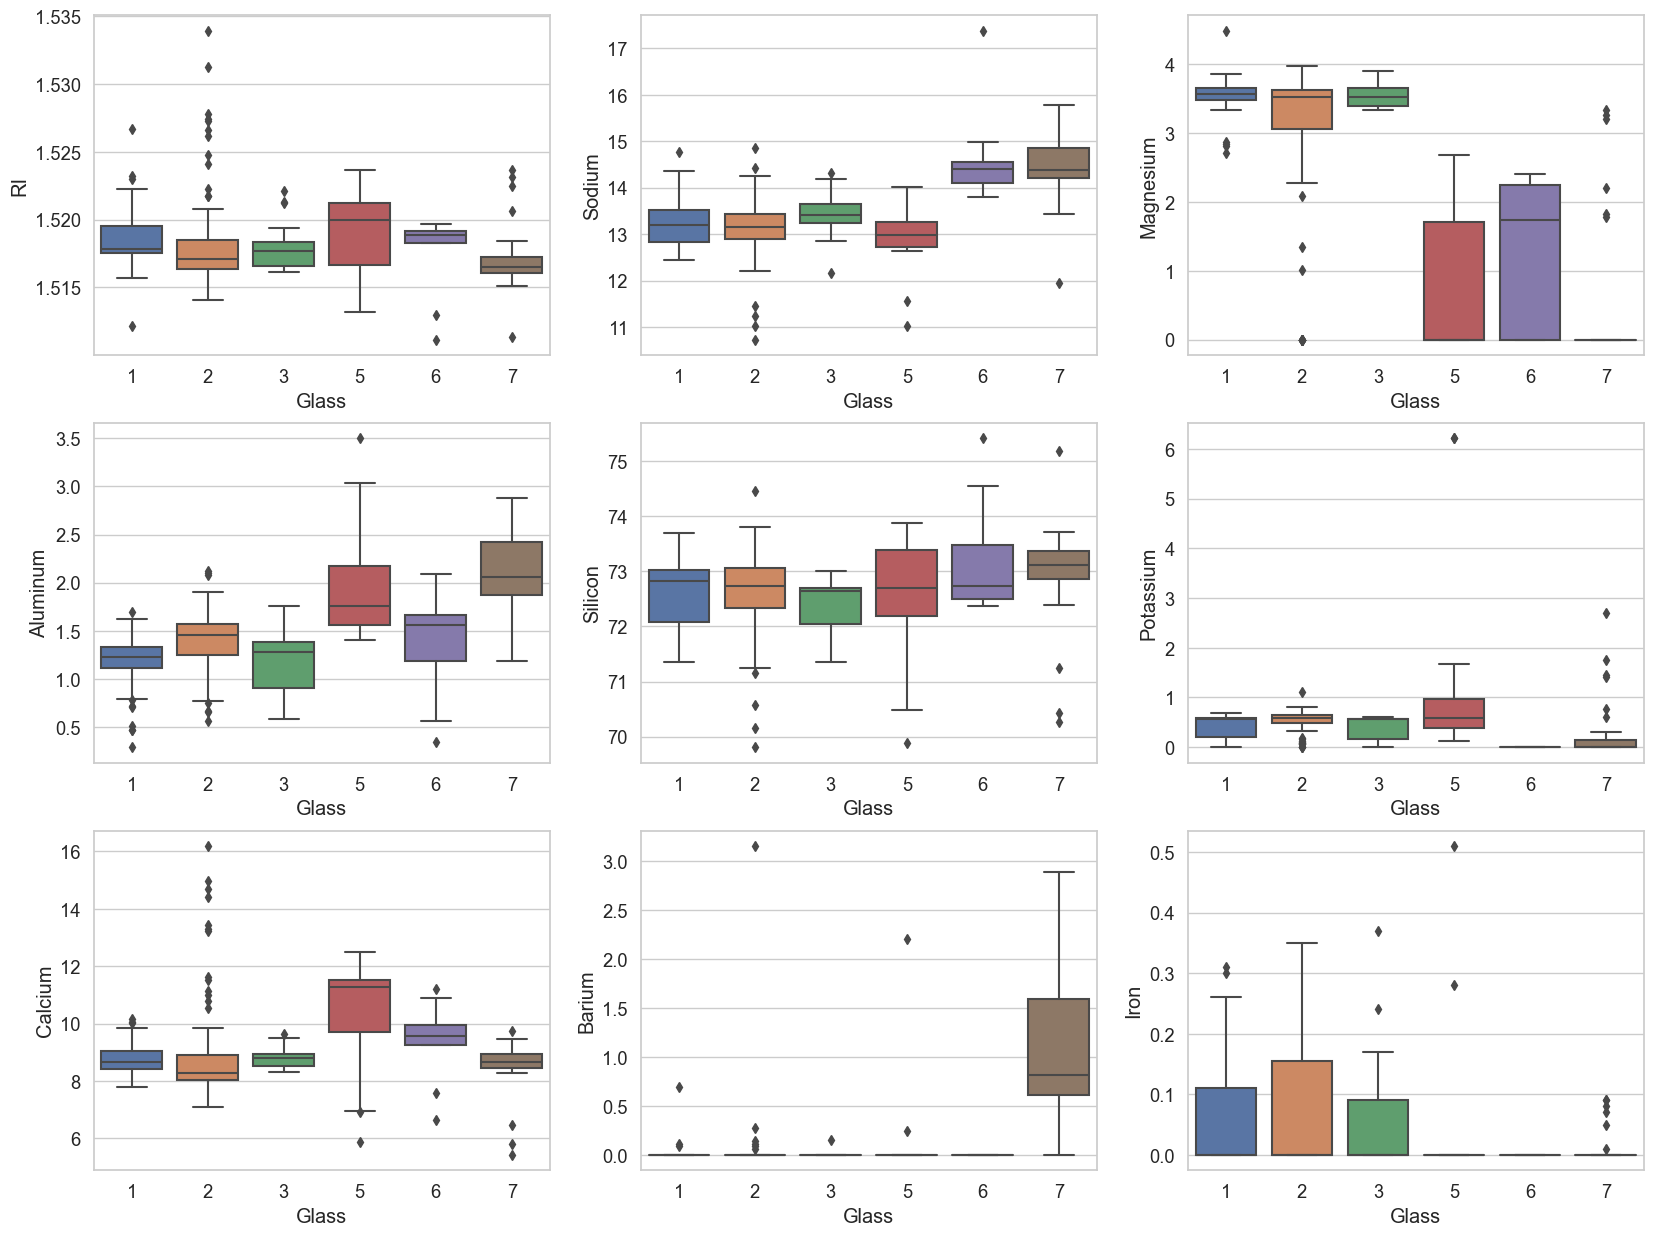

In [35]:
sns.set(style="whitegrid",font_scale=1.2)
plt.subplots(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x="Glass",y="RI",data=df)
plt.subplot(3,3,2)
sns.boxplot(x="Glass",y="Sodium",data=df)
plt.subplot(3,3,3)
sns.boxplot(x="Glass",y="Magnesium",data=df)
plt.subplot(3,3,4)
sns.boxplot(x="Glass",y="Aluminum",data=df)
plt.subplot(3,3,5)
sns.boxplot(x="Glass",y="Silicon",data=df)
plt.subplot(3,3,6)
sns.boxplot(x="Glass",y="Potassium",data=df)
plt.subplot(3,3,7)
sns.boxplot(x="Glass",y="Calcium",data=df)
plt.subplot(3,3,8)
sns.boxplot(x="Glass",y="Barium",data=df)
plt.subplot(3,3,9)
sns.boxplot(x="Glass",y="Iron",data=df)
plt.subplot(3,3,9)
plt.show()

In [36]:
z=np.abs(zscore(df))
z

,IDNo,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Glass
0,1.723976,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.848275
1,1.707788,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,0.848275
2,1.691601,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,0.848275
3,1.675413,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,0.848275
4,1.659226,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,0.848275
...,...,...,...,...,...,...,...,...,...,...,...
209,1.659226,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,2.010478
210,1.675413,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,2.010478
211,1.691601,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,2.010478
212,1.707788,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451,2.010478


In [37]:
threshold=3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([7, 1, 2, 5, 7, 8, 1, 5, 7, 7, 7, 1, 7, 7, 9, 9, 4, 5, 8, 4, 6, 4,
       6, 9, 2, 5, 5, 8, 5, 6, 8, 8, 8], dtype=int64))


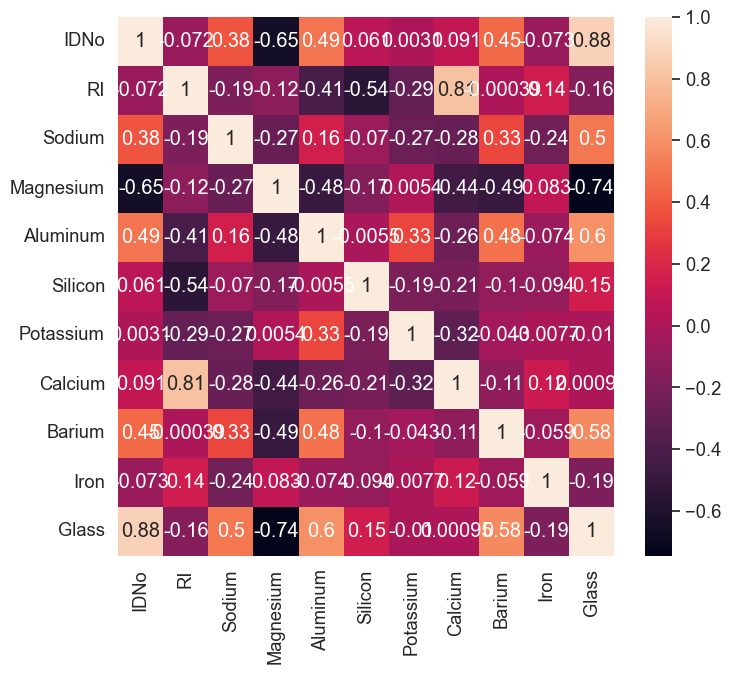

In [38]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [40]:
x=df.iloc[:,0:-1]
x

,IDNo,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [41]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Glass, Length: 214, dtype: int64

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [43]:
x_train.shape

(149, 10)

In [44]:
x_test.shape

(65, 10)

In [45]:
y_train.shape

(149,)

In [46]:
y_test.shape

(65,)

In [48]:
lm=LogisticRegression()

In [49]:
lm.fit(x_train,y_train)

LogisticRegression()

In [50]:
lm.score(x_train,y_train)


0.9932885906040269

In [51]:
pred=lm.predict(x_test)
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 5, 2, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 3, 2, 2, 2, 7, 1, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 7, 2, 5, 1, 1, 2, 1, 7, 5],
      dtype=int64)

In [54]:
print('Accuracy of LR Model:',metrics.accuracy_score(y_test,pred))

Accuracy of LR Model: 1.0


In [55]:
dt=DecisionTreeClassifier()

In [56]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
preddt=dt.predict(x_test)
preddt

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 5, 2, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 2, 7, 5, 3, 2, 2, 2, 7, 1, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 7, 2, 5, 1, 1, 2, 1, 7, 5],
      dtype=int64)

In [58]:
print('Accuracy of DT Model:',metrics.accuracy_score(y_test,preddt))

Accuracy of DT Model: 0.9692307692307692


In [61]:
sv=SVC()

In [62]:
sv.fit(x_train,y_train)

SVC()

In [63]:
predsv=sv.predict(x_test)
predsv

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 7, 3, 2, 2, 7, 3, 7, 1, 1, 7, 2, 7,
       7, 7, 2, 2, 1, 1, 3, 1, 1, 2, 2, 2, 2, 7, 3, 2, 2, 2, 2, 7, 1, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 7, 2, 3, 1, 1, 2, 1, 7, 3],
      dtype=int64)

In [69]:
print('Accuracy of SVC Model:',metrics.accuracy_score(y_test,predsv))

Accuracy of SVC Model: 0.8


In [70]:
g=GaussianNB()

In [71]:
g.fit(x_train,y_train)

GaussianNB()

In [72]:
predg=g.predict(x_test)
predg

array([1, 7, 1, 7, 2, 2, 1, 1, 1, 3, 6, 5, 2, 1, 6, 5, 7, 1, 1, 7, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 2, 3, 3, 2, 1, 7, 5, 3, 2, 2, 2, 7, 1, 1,
       2, 2, 2, 1, 2, 3, 1, 1, 1, 2, 1, 1, 7, 1, 2, 1, 1, 3, 1, 7, 5],
      dtype=int64)

In [73]:
print('Accuracy of GaussianNB Model:',metrics.accuracy_score(y_test,predg))

Accuracy of GaussianNB Model: 0.7846153846153846


In [74]:
GBC=GradientBoostingClassifier()

In [75]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [76]:
predGBC=GBC.predict(x_test)
predGBC

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 5, 2, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 2, 7, 5, 3, 2, 2, 2, 7, 1, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 7, 2, 5, 1, 1, 2, 1, 7, 5],
      dtype=int64)

In [77]:
print('Accuracy of GBC Model:',metrics.accuracy_score(y_test,predGBC))

Accuracy of GBC Model: 0.9692307692307692


In [78]:
import pickle
file="Glass_Pred_Model.pkl"
pickle.dump(lm,open(file,'wb'))
final_model=pickle.load(open(file,'rb'))
result=final_model.score(x_test,y_test)
print(result)

1.0


In [79]:
print('Final Model accuracy is:',result*100,'%')

Final Model accuracy is: 100.0 %
